# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# loading dataset as pandas dataframe
df = pd.read_csv('curated_aqsoldb.csv')

##### Using descriptors based on Delaney's method - MolLogP, MolWt, NumRotatableBonds, AromaticProportion (AP) (https://pubmed.ncbi.nlm.nih.gov/15154768/)

In [3]:
# creating X matrix from descriptors chosen
X = df[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AP']]
X

,MolLogP,MolWt,NumRotatableBonds,AP
0,3.95810,392.510,17.0,0.000000
1,2.40550,169.183,0.0,0.769231
2,2.15250,140.569,1.0,0.666667
3,8.11610,756.226,10.0,0.679245
4,2.48540,422.525,12.0,0.387097
...,...,...,...,...
9977,2.61700,264.369,8.0,0.315789
9978,-0.21440,444.440,2.0,0.187500
9979,2.82402,150.221,1.0,0.545455
9980,5.09308,454.611,13.0,0.363636


In [4]:
# creating Y matrix from Solubility values
Y = df['Solubility']

In [5]:
# split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [6]:
# build linear regresson model
regr = linear_model.LinearRegression()

# fit model using training set
regr.fit(x_train, y_train)

LinearRegression()

In [7]:
# intercept value
regr.intercept_

-1.0622796381398851

In [8]:
# gradient value
regr.coef_

array([-0.3864577 , -0.00441066,  0.08419577, -0.73636845])

In [9]:
# predict solubility values based on training set
y_predict_train = regr.predict(x_train)

In [10]:
regr.score(x_train, y_train)

0.4621995670130794

In [11]:
regr.score(x_test, y_test)

0.41838912787696014

In [12]:
mean_squared_error(y_train, y_predict_train)

# shows there is a high measure of error

2.9755980932139363

In [13]:
r2_score(y_train, y_predict_train)

# shows poor goodness of fit

0.4621995670130794

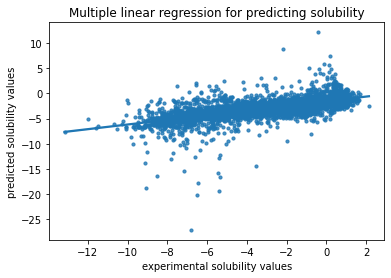

In [27]:
sns.regplot(x=y_train, y=y_predict_train, scatter_kws={"s": 10}).set(title='Multiple linear regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')
plt.savefig('mlr_delaney.jpg', bbox_inches='tight')